In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.16.2
3.7.0


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 82s 0us/step


In [3]:
print("Трейн:", x_train.shape, y_train.shape)
print("Тест:", x_test.shape, y_test.shape)

Трейн: (50000, 32, 32, 3) (50000, 1)
Тест: (10000, 32, 32, 3) (10000, 1)


In [4]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

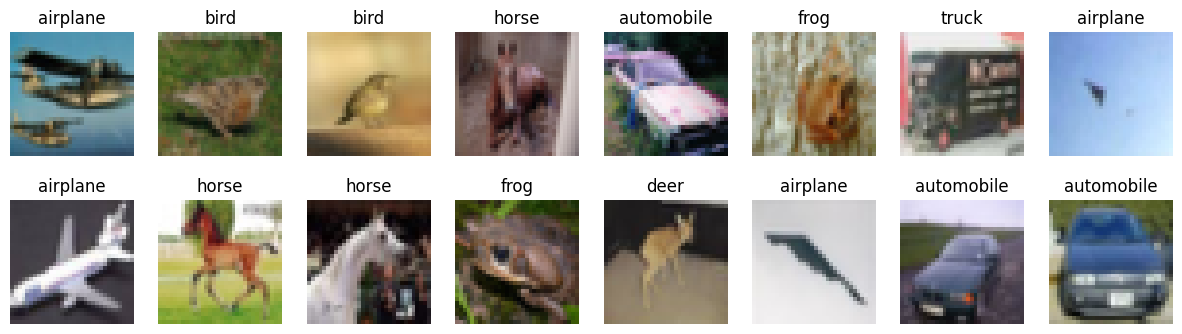

In [5]:
# посмотрим на примеры картинок
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [6]:
# нормализуем входы
x_train2 = x_train.astype('float32') / 255 - 0.5
x_test2 = x_test.astype('float32') / 255 - 0.5

# конвертируем метки в np.array (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [7]:
# слои, которые нам пригодятся
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [15]:
def make_default_model():
    model = Sequential()
    model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))  # Изменил input_shape
    model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))
    model.add(L.MaxPool2D(2, 2))
    model.add(L.Conv2D(128, kernel_size=3, strides=1, padding='same'))
    model.add(L.Conv2D(128, kernel_size=3, strides=1, padding='same'))
    model.add(L.MaxPool2D(2, 2))
    model.add(L.Flatten())  
    model.add(L.Dense(10, activation='softmax'))

    return model

In [16]:
K.clear_session()
model = make_default_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        81,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,762 (1.23 MB)

 Trainable params: 322,762 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
def train_model(make_model_func=make_default_model, optimizer="adam"):
  BATCH_SIZE = 32
  EPOCHS = 10

  K.clear_session()
  model = make_model_func()

  model.compile(
      loss='categorical_crossentropy',
      optimizer=optimizer,
      metrics=['accuracy']
  )

  model.fit(
      x_train2, y_train2,  # нормализованные данные
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=(x_test2, y_test2),
      shuffle=False
  )
  
  return model

# учим дефолтную архитектуру
train_model()

Epoch 1/10


2025-02-11 00:39:02.806496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.4868 - loss: 1.4592 - val_accuracy: 0.6379 - val_loss: 1.0612
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6461 - loss: 1.0374 - val_accuracy: 0.6536 - val_loss: 1.0305
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.6909 - loss: 0.9093 - val_accuracy: 0.6532 - val_loss: 1.0609
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7244 - loss: 0.8039 - val_accuracy: 0.6462 - val_loss: 1.1513
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7576 - loss: 0.7111 - val_accuracy: 0.6444 - val_loss: 1.2847
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7879 - loss: 0.6247 - val_accuracy: 0.6297 - val_loss: 1.4560
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8049 - loss: 0.5740 - val_accuracy: 0.6146 - val_loss: 1.6636
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8208 - loss: 0.52

<Sequential name=sequential, built=True>

https://cs231n.github.io/convolutional-networks/

https://brohrer.github.io/how_convolutional_neural_networks_work.html

https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [18]:
def make_sigmoid_model():
    model = Sequential()
    model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))  # CIFAR-10
    model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))
    model.add(L.MaxPool2D(2, 2))
    model.add(L.Conv2D(128, kernel_size=3, strides=1, padding='same'))
    model.add(L.Conv2D(128, kernel_size=3, strides=1, padding='same'))
    model.add(L.MaxPool2D(2, 2))
    model.add(L.Flatten())  
    model.add(L.Dense(10, activation='sigmoid'))  # Используем sigmoid вместо softmax

    return model

In [19]:
# учим sigmoid
train_model(make_sigmoid_model)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4862 - loss: 1.4609 - val_accuracy: 0.6365 - val_loss: 1.0616
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6469 - loss: 1.0355 - val_accuracy: 0.6512 - val_loss: 1.0350
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6899 - loss: 0.9079 - val_accuracy: 0.6530 - val_loss: 1.0822
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7272 - loss: 0.8016 - val_accuracy: 0.6433 - val_loss: 1.1790
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7589 - loss: 0.7082 - val_accuracy: 0.6383 - val_loss: 1.2994
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7852 - loss: 0.6275 - val_accuracy: 0.6218 - val_loss: 1.4822
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8033 - loss: 0.5714 - val_accuracy: 0.6204 - val_loss: 1.6162
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8196 -

<Sequential name=sequential, built=True>

In [20]:
def make_bn_model():
    model = Sequential()
    
    model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))
    model.add(L.BatchNormalization())  # Нормализация перед активацией
    model.add(L.ReLU())  # Функция активации

    model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))
    model.add(L.BatchNormalization())
    model.add(L.ReLU())

    model.add(L.MaxPool2D(2, 2))

    model.add(L.Conv2D(128, kernel_size=3, strides=1, padding='same'))
    model.add(L.BatchNormalization())
    model.add(L.ReLU())

    model.add(L.Conv2D(128, kernel_size=3, strides=1, padding='same'))
    model.add(L.BatchNormalization())
    model.add(L.ReLU())

    model.add(L.MaxPool2D(2, 2))

    model.add(L.Flatten())  
    model.add(L.Dense(10, activation='softmax'))

    return model